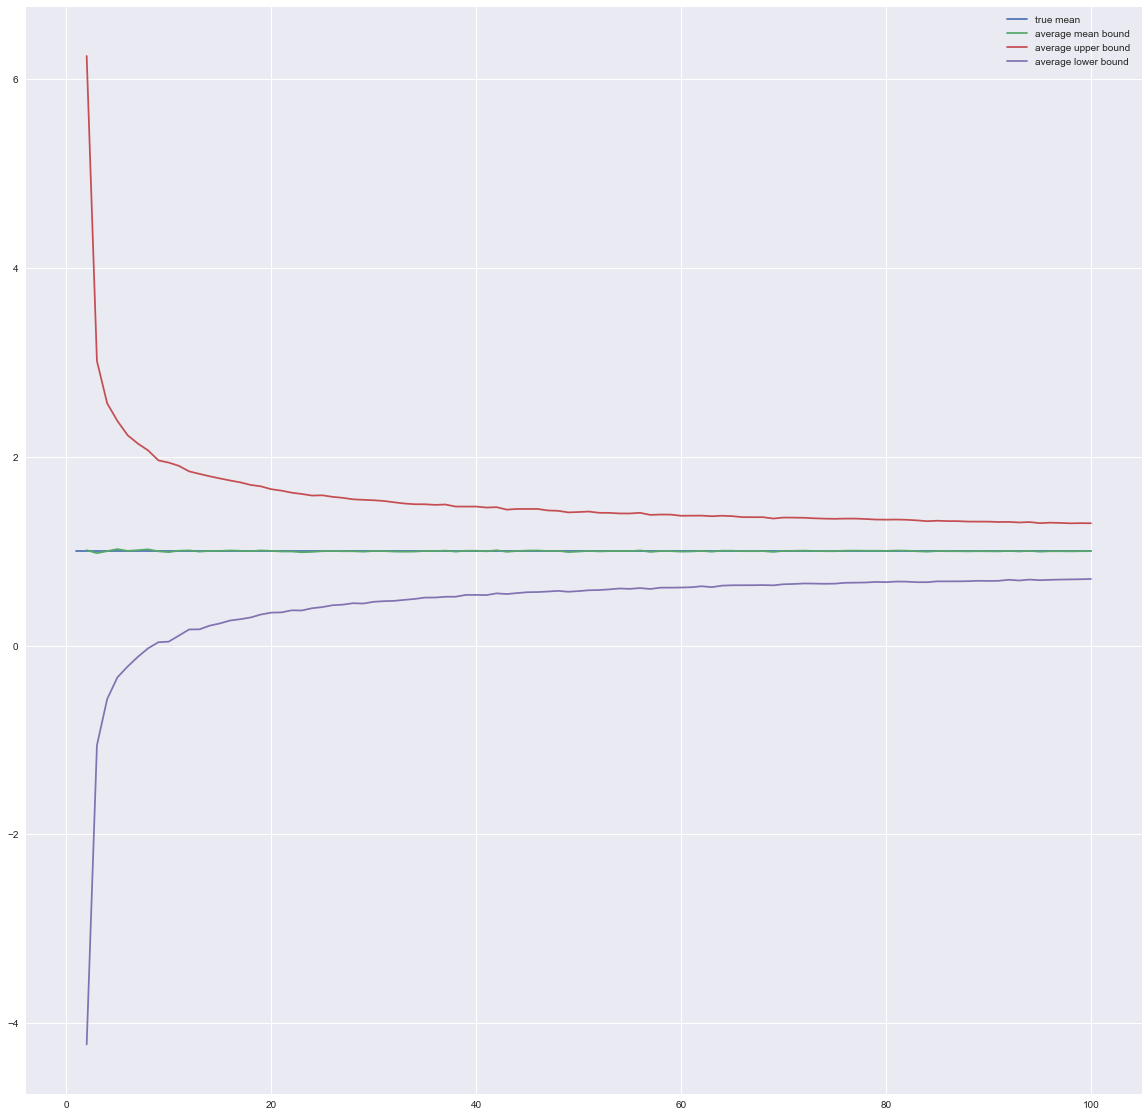

In [38]:
####################################################################################
# Estimating upper and lower bounds on the mean of a sample, where bounds on the 
# mean are calculated using Central Limit Theorem.
# Using normal distribution as the true distribution
####################################################################################

import numpy as np
from scipy.stats import norm, t
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,20)

confidence = .95

true_mean = 1.0
true_std = 1.0
l_bound = []
u_bound = []
avg_mean = []
l_lim_mean = []
u_lim_mean = []

for N in range(1, 101):
    u_lim = []
    sample_mean = []
    l_lim = []
    for iters in range(1000):
        samples = np.random.normal(loc=true_mean, scale=true_std, size=N)
    
        est_mean = np.mean(samples)
        est_std = np.sqrt(np.var(samples))
        est_mean_error = est_std / np.sqrt(N)
        df = N - 1  # Degrees of freedom for t distribution
        z_score = t.ppf(q=(confidence_param + (1 - confidence_param)/2.0), df=df, loc=est_mean, scale=est_std)
        lower_limit = est_mean - est_mean_error * z_score
        upper_limit = est_mean + est_mean_error * z_score
        
        u_lim.append(upper_limit)
        l_lim.append(lower_limit)
        sample_mean.append((upper_limit + lower_limit) / 2.0)
    
    l_lim_mean.append(np.array(l_lim).mean())
    u_lim_mean.append(np.array(u_lim).mean())
    avg_mean.append(np.array(sample_mean).mean())
    

sns.set_style("darkgrid")
plt.subplot(111)
plt.plot(range(1, 101), [1.0] * 100, label='true mean')
plt.plot(range(1, 101), avg_mean, label='average mean bound')
plt.plot(range(1, 101), u_lim_mean, label='average upper bound ')
plt.plot(range(1, 101), l_lim_mean, label='average lower bound ')
plt.legend(loc='best')


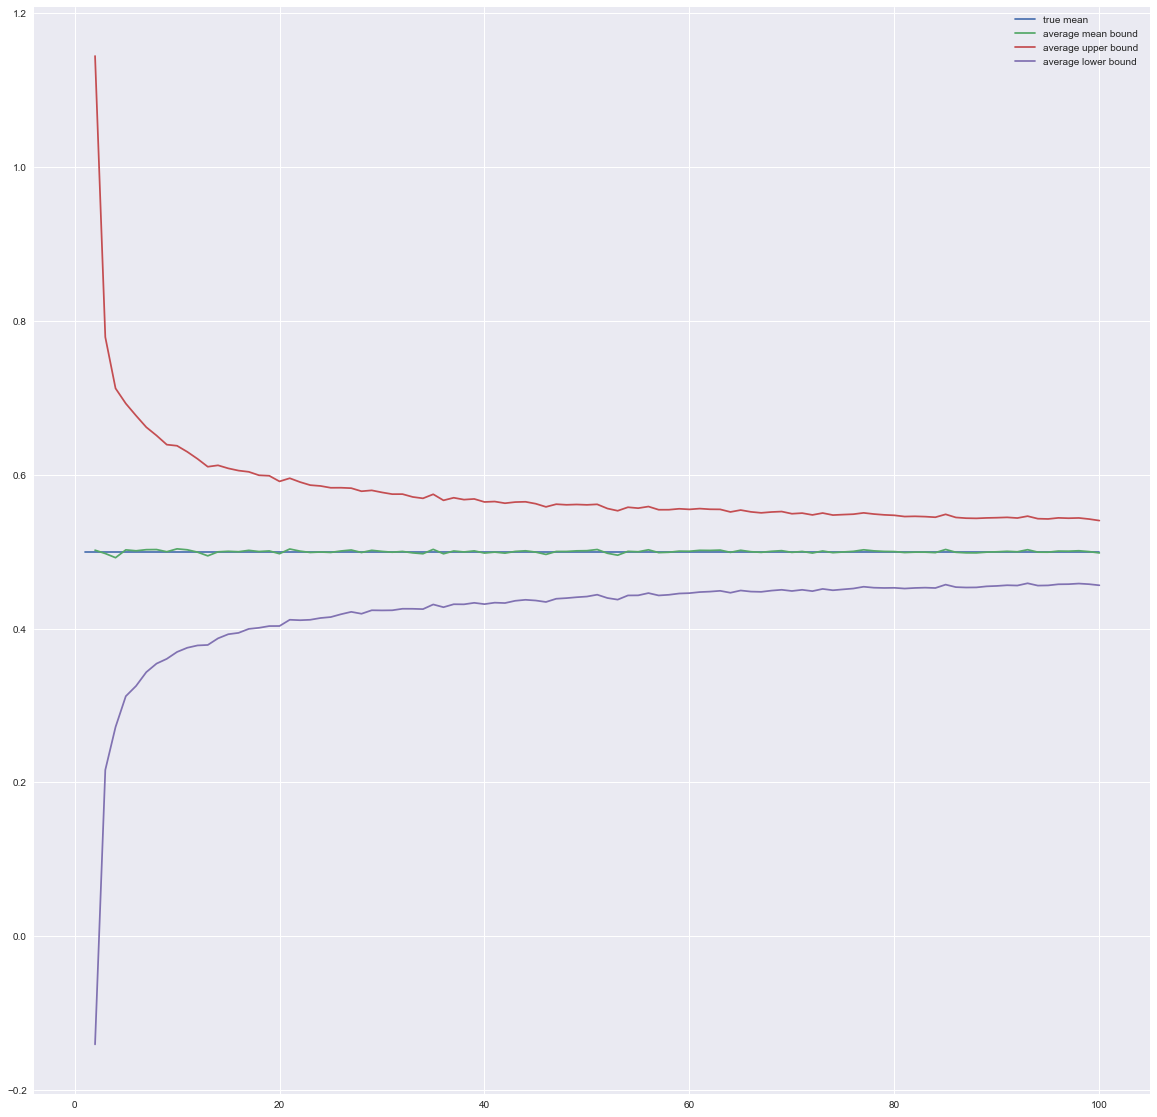

In [40]:
####################################################################################
# Estimating upper and lower bounds on the mean of a sample, where bounds on the 
# mean are calculated using Central Limit Theorem.
# Using beta distribution as the true ditribution
####################################################################################

import numpy as np
from scipy.stats import norm, t
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,20)

confidence = .95

true_mean = 0.5
# true_std = 1.0
l_bound = []
u_bound = []
avg_mean = []
l_lim_mean = []
u_lim_mean = []

for N in range(1, 101):
    u_lim = []
    sample_mean = []
    l_lim = []
    for iters in range(1000):
        samples = np.random.beta(a = 0.5, b = 0.5, size=N)
    
        est_mean = np.mean(samples)
        est_std = np.sqrt(np.var(samples))
        est_mean_error = est_std / np.sqrt(N)
        df = N - 1  # Degrees of freedom for t distribution
        z_score = t.ppf(q=(confidence_param + (1 - confidence_param)/2.0), df=df, loc=est_mean, scale=est_std)
        lower_limit = est_mean - est_mean_error * z_score
        upper_limit = est_mean + est_mean_error * z_score
        
        u_lim.append(upper_limit)
        l_lim.append(lower_limit)
        sample_mean.append((upper_limit + lower_limit) / 2.0)
    
    l_lim_mean.append(np.array(l_lim).mean())
    u_lim_mean.append(np.array(u_lim).mean())
    avg_mean.append(np.array(sample_mean).mean())
    
#     l_bound.append(lower_limit)
#     u_bound.append(upper_limit)
#     avg_mean.append((lower_limit + upper_limit) / 2.0)
    

sns.set_style("darkgrid")
plt.subplot(111)
# plt.plot(range(1, 1001), l_bound, label='lower bound')
# plt.plot(range(1, 1001), u_bound, label='upper bound')upper
plt.plot(range(1, 101), [true_mean] * 100, label='true mean')
plt.plot(range(1, 101), avg_mean, label='average mean bound')
plt.plot(range(1, 101), u_lim_mean, label='average upper bound ')
plt.plot(range(1, 101), l_lim_mean, label='average lower bound ')
plt.legend(loc='best')


In [11]:
####################################################################################
# Estimating upper and lower bounds on the mean of a sample, where bounds on the 
# mean are calculated using Central Limit Theorem.
# Using normal distribution as the true distribution
####################################################################################

import numpy as np
from scipy.stats import norm, t
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,20)

confidence = .95

true_mean = 1.0
true_std = 1.0

df_list = []
columns=["N", "Bound", "Type", "OBS"]

for N in range(1, 11):
    u_lim = []
    sample_mean = []
    l_lim = []
    for iters in range(1000):
        samples = np.random.normal(loc=true_mean, scale=true_std, size=N)
    
        est_mean = np.mean(samples)
        est_std = np.sqrt(np.var(samples))
        est_mean_error = est_std / np.sqrt(N)
        df = N - 1  # Degrees of freedom for t distribution
        z_score = t.ppf(q=(confidence_param + (1 - confidence_param)/2.0), df=df, loc=est_mean, scale=est_std)
        lower_limit = est_mean - est_mean_error * z_score
        upper_limit = est_mean + est_mean_error * z_score
        
        df_list.append([N, upper_limit, 'Upper Limit', iters])
        df_list.append([N, lower_limit, 'Lower Limit', iters])
        
df = pd.DataFrame(data=df_list, columns=columns)

print df.head(10)
    


   N  Bound         Type  OBS
0  1    NaN  Upper Limit    0
1  1    NaN  Lower Limit    0
2  1    NaN  Upper Limit    1
3  1    NaN  Lower Limit    1
4  1    NaN  Upper Limit    2
5  1    NaN  Lower Limit    2
6  1    NaN  Upper Limit    3
7  1    NaN  Lower Limit    3
8  1    NaN  Upper Limit    4
9  1    NaN  Lower Limit    4


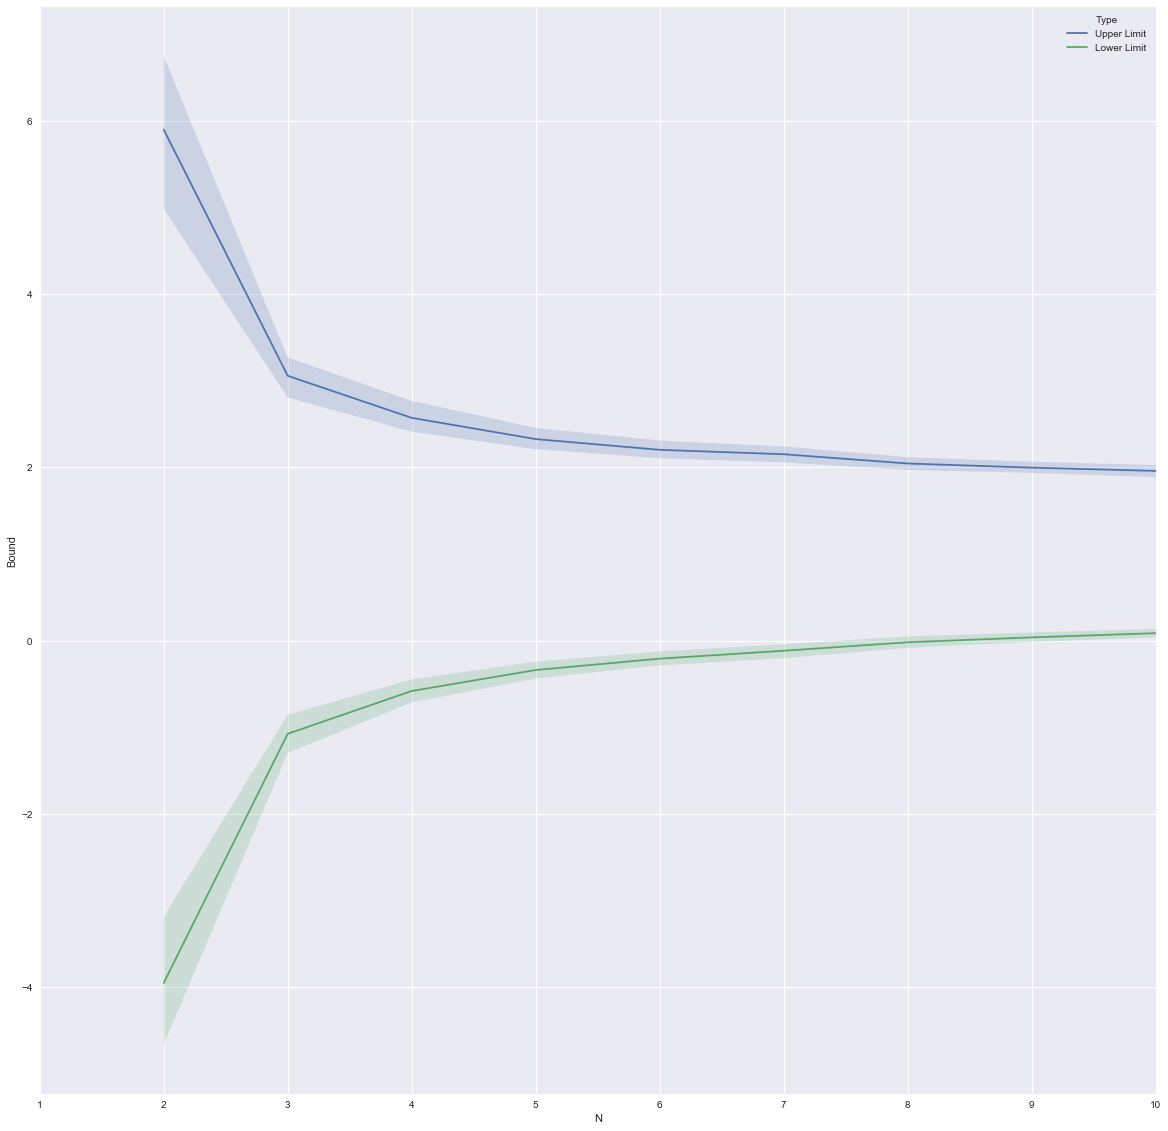

In [12]:
sns.tsplot(data=df, value="Bound", unit="OBS", condition="Type", time="N", ci=100)